<a href="https://colab.research.google.com/github/sanamsabooni/Attrition_Rates_of_Workers/blob/main/Employee_Attrition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/HR-Employee-Attrition.csv') #laoding dataset

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.head(5) # dataset view

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:

data_numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
26
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
9


In [ ]:
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data = data.drop(columns=['StandardHours',
                          'EmployeeCount',
                          'Over18',
                        ])

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data=data[(data['Age']<56.5)&(data['MonthlyIncome']<11571.125) & (data['NumCompaniesWorked']<8.5) & (data['StockOptionLevel']<2.5) & (data['TotalWorkingYears']<20) & (data['TrainingTimesLastYear']<4.5) & (data['YearsAtCompany']<18) & (data['YearsInCurrentRole']<14.5) & (data['YearsSinceLastPromotion']<7.5) & (data['YearsWithCurrManager']<14.5) ]

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,8,4,...,3,3,0,8,2,2,7,7,3,6


In [ ]:
data_final=data
data_final['AllSatisfaction']=data_final['EnvironmentSatisfaction']+data_final['JobSatisfaction']+data_final['RelationshipSatisfaction']
columns_final = list(data_final.columns)
print(columns_final)
columns_final.remove("Attrition")
columns_final.remove("EnvironmentSatisfaction")
columns_final.remove("JobSatisfaction")
columns_final.remove("RelationshipSatisfaction")
columns_final.remove("YearsInCurrentRole")
# columns_final.remove("YearsAtCompany")
# columns_final.remove("YearsWithCurrManager")
# columns_final.remove("MonthlyIncome")
# columns_final.remove("TotalWorkingYears")



print(columns_final)
x,y = SMOTE().fit_resample(data_final[columns_final],data_final["Attrition"])


['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AllSatisfaction']
['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtC

In [ ]:
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1

Lower=Q1-1.5*IQR
Upper=Q3+1.5*IQR
print(Upper)

Age                           59.000
BusinessTravel                 3.500
DailyRate                   2095.625
Department                     1.000
DistanceFromHome              30.500
Education                      4.500
EducationField                 6.000
EmployeeNumber              2971.000
Gender                         2.500
HourlyRate                   127.125
JobInvolvement                 4.500
JobLevel                       3.500
JobRole                       12.000
MaritalStatus                  3.500
MonthlyRate                39987.000
NumCompaniesWorked             8.500
OverTime                       2.500
PercentSalaryHike             24.500
PerformanceRating              3.000
StockOptionLevel               2.500
TotalWorkingYears             25.000
TrainingTimesLastYear          4.500
WorkLifeBalance                4.500
YearsSinceLastPromotion        5.000
AllSatisfaction               13.500
dtype: float64


In [ ]:
#x=x[(x['Age']<59)& (x['NumCompaniesWorked']<8.5) & (x['StockOptionLevel']<2.5) & (x['TotalWorkingYears']<25) & (x['TrainingTimesLastYear']<4.5)   & (x['YearsSinceLastPromotion']<5)  ]

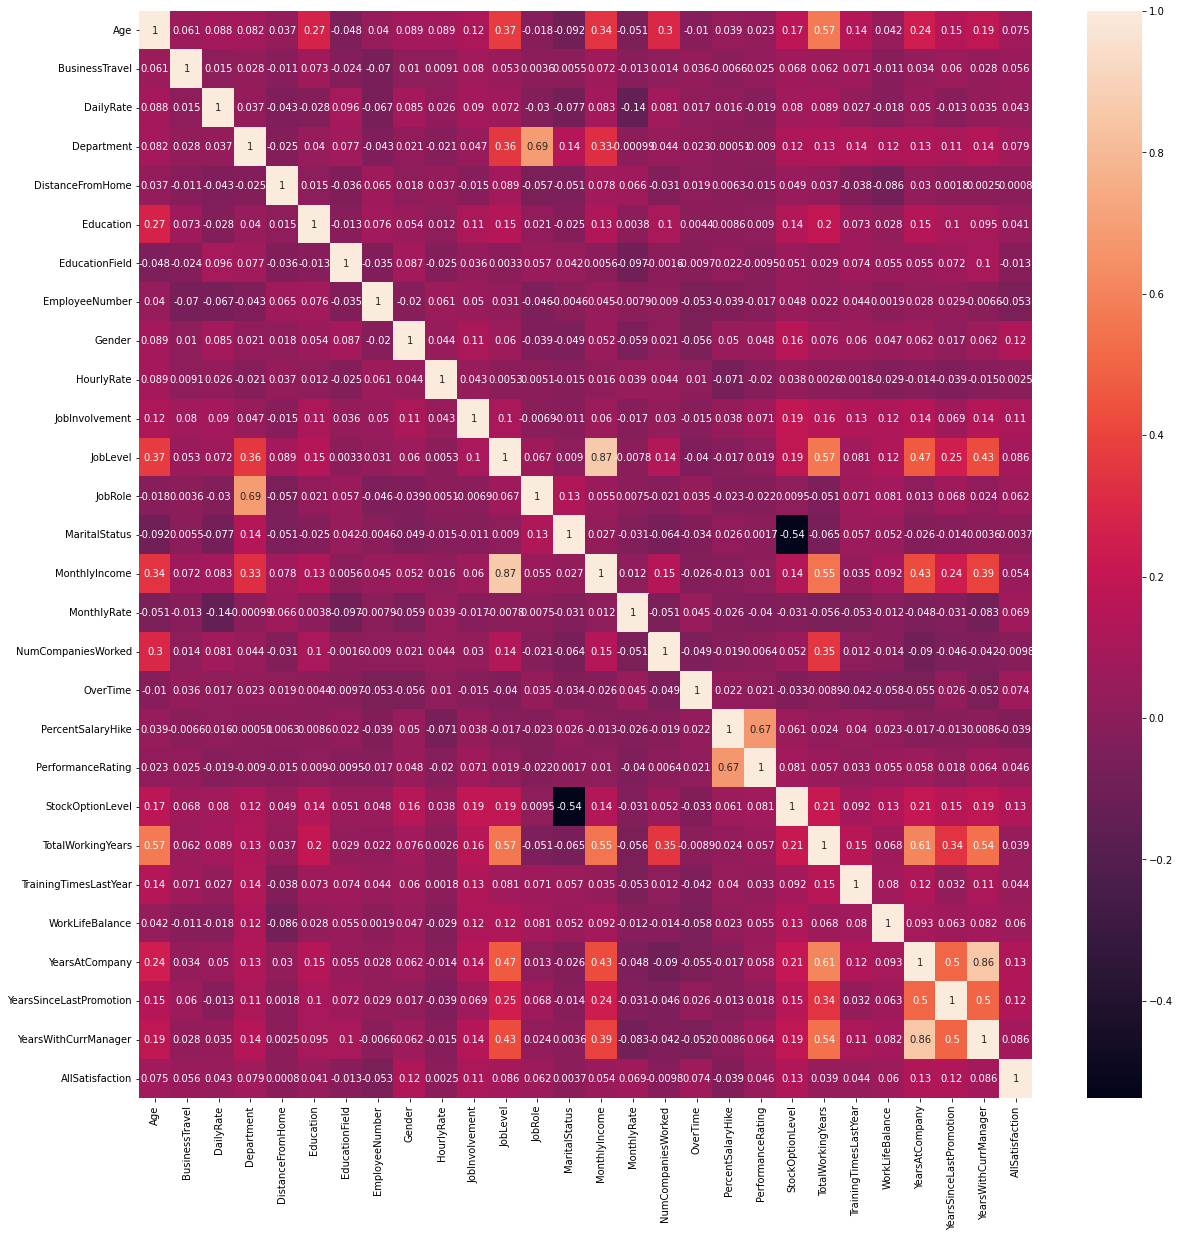

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_norm=MinMaxScaler().fit(x)
x_norm_transform=x_norm.transform(x)
print(x_norm_transform.shape)
print(x_norm_transform)

(1452, 28)
[[0.60526316 1.         0.71612903 ... 0.         0.38461538 0.44444444]
 [0.81578947 0.5        0.12616487 ... 0.14285714 0.53846154 0.66666667]
 [0.5        1.         0.91039427 ... 0.         0.         0.66666667]
 ...
 [0.07894737 1.         0.21863799 ... 0.         0.         0.55555556]
 [0.73684211 0.5        0.49677419 ... 0.14285714 0.23076923 0.55555556]
 [0.05263158 1.         0.7125448  ... 0.         0.         0.33333333]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_norm_transform,
                                                 y,
                                                 test_size = 0.3,
                                                 shuffle=True)

Test Accuracy : 0.83 %


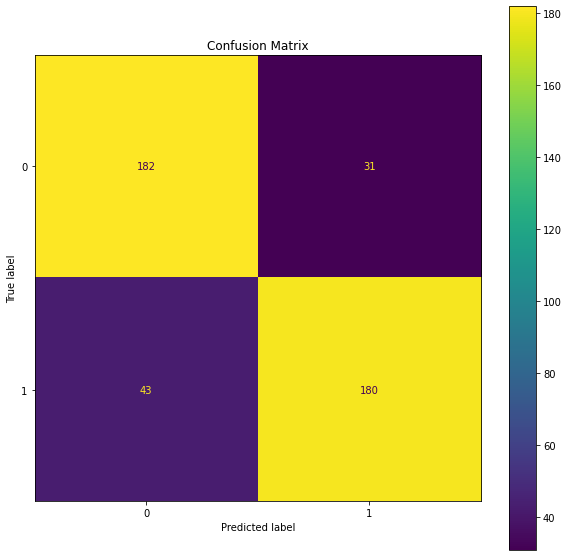

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)

print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Test Accuracy : 0.91 %


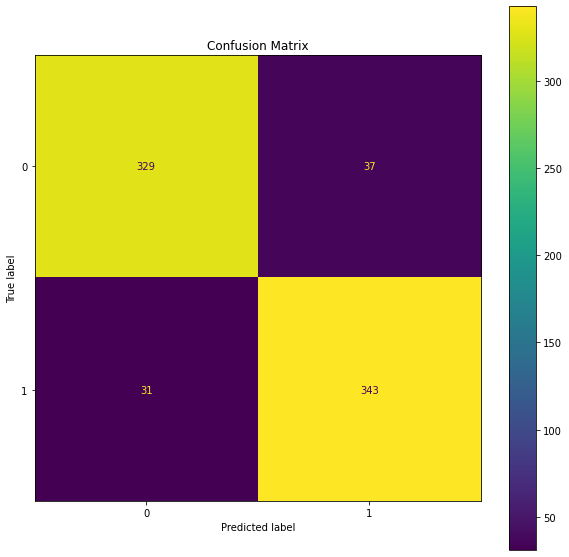

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1580,max_depth=37,
).fit(X_train,Y_train)

print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)

fig, ax = plt.subplots(figsize=(10,10))

plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

Test Accuracy : 0.92 %


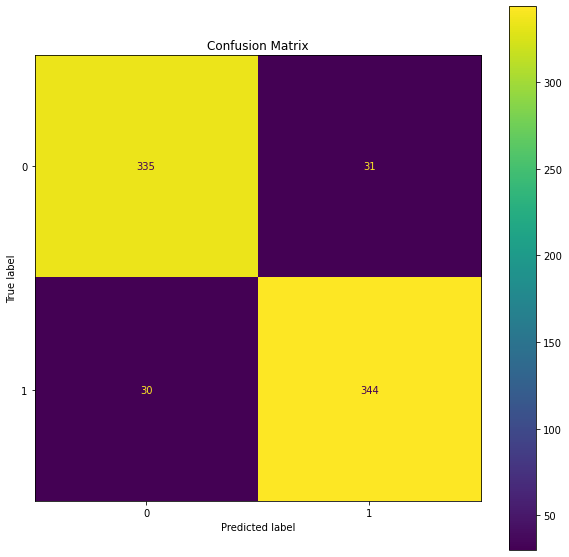

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.15,n_estimators=1890,use_label_encoder=False,random_state=42,max_depth=163).fit(X_train,Y_train)


print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [ ]:
# import optuna
# import sklearn.svm
# def objective(trial):

#     classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])

#     if classifier == 'RandomForest':
#         n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
#         max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

#         clf = sklearn.ensemble.RandomForestClassifier(
#             n_estimators=n_estimators, max_depth=max_depth)
#     else:
#         c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)

#         clf = sklearn.svm.SVC(C=c, gamma='auto')

#     return sklearn.model_selection.cross_val_score(
#         clf,X_train,Y_train, n_jobs=-1, cv=3).mean()

import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['xgb', 'SVC'])

    if classifier == 'xgb':
        n_estimators = trial.suggest_int('n_estimators', 200, 2500,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))
        lr=(trial.suggest_float('learning_rate', 0.001, 1, log=True))
        clf = XGBClassifier(learning_rate=lr,
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)

        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,Y_train, n_jobs=-1, cv=3).mean()


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-04-17 07:49:57,908] A new study created in memory with name: no-name-1ab459d6-87ee-480b-9b55-a12b842860fe
[I 2022-04-17 07:50:05,527] Trial 0 finished with value: 0.8887570450885668 and parameters: {'classifier': 'xgb', 'n_estimators': 530, 'max_depth': 12.349036334620713, 'learning_rate': 0.11668948259930462}. Best is trial 0 with value: 0.8887570450885668.
[I 2022-04-17 07:50:05,998] Trial 1 finished with value: 0.5023178341384864 and parameters: {'classifier': 'SVC', 'svc_c': 0.00032998846877420725}. Best is trial 0 with value: 0.8887570450885668.
[I 2022-04-17 07:50:06,439] Trial 2 finished with value: 0.7508635265700483 and parameters: {'classifier': 'SVC', 'svc_c': 0.0819887367424189}. Best is trial 0 with value: 0.8887570450885668.
[I 2022-04-17 07:50:06,886] Trial 3 finished with value: 0.5023178341384864 and parameters: {'classifier': 'SVC', 'svc_c': 2.616928373942288e-05}. Best is trial 0 with value: 0.8887570450885668.
[I 2022-04-17 07:50:07,363] Trial 4 finished wit

Accuracy: 0.8945471014492754
Best hyperparameters: {'classifier': 'xgb', 'n_estimators': 1890, 'max_depth': 13.14396607379569, 'learning_rate': 0.21591209025532987}


In [ ]:
rfo=RandomForestClassifier(n_estimators=1580,max_depth=37)
rfo.fit(X_train,Y_train)

RandomForestClassifier(max_depth=37, n_estimators=1580)

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



model = Sequential()
model.add(Dense(256, input_dim=28, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model.fit(X_train, Y_train, epochs=250, batch_size=64,validation_data=(X_test, Y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

NameError: ignored

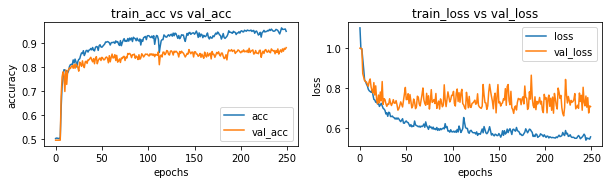

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 210 kB 38.5 MB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 19.7 MB/s 
     |████████████████████████████████| 146 kB 42.2 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=b562e3f410ad1dd0efd4dd26321089a3f14d9f3ac55482e857274477a87cc1d2
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
